# Building and Evaluating an Artificial Neural Network for Customer Churn Prediction

This project demonstrates how to build and evaluate an Artificial Neural Network (ANN) to predict customer churn. Using TensorFlow and Keras, the ANN is trained on customer data to identify potential churners. Key steps include data preprocessing, model training, and performance evaluation with accuracy and confusion matrix.

# Artificial Neural Network
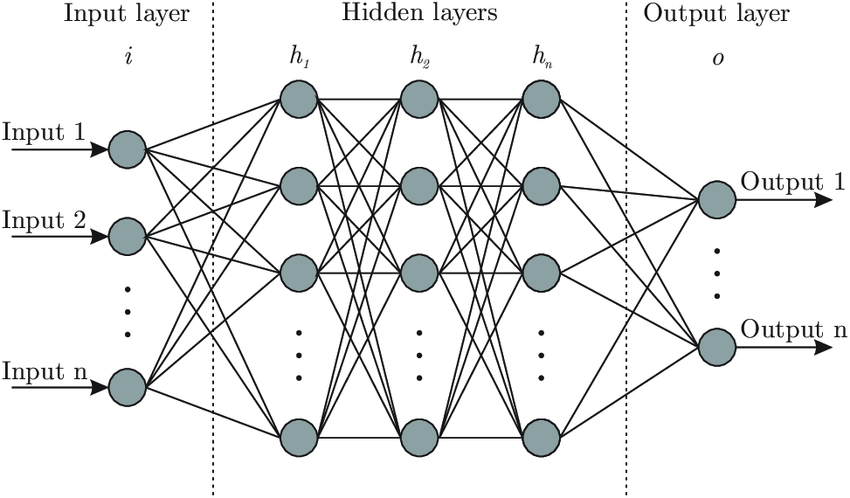

An Artificial Neural Network (ANN) is a machine learning model inspired by the human brain. It consists of layers of interconnected nodes or neurons: an input layer, hidden layers, and an output layer. Each neuron processes inputs through weighted connections, applies an activation function (like ReLU or Sigmoid), and passes the output to the next layer. The network is trained by adjusting weights using techniques like backpropagation and gradient descent to minimize error. ANNs are used in image recognition, natural language processing, and more, making them versatile tools for pattern recognition and decision-making in AI systems.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.17.0'

### Importing the dataset

This dataset is designed to support predictive modeling aimed at identifying customers who have exited the bank. It includes comprehensive customer information across 10,000 entries and 14 features, allowing for robust analysis and model training.

The primary goal is to predict the Exited status, identifying which customers are likely to leave the bank. By analyzing patterns and correlations in the data, we can develop predictive models to anticipate churn and implement strategies to enhance customer retention.

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Devided in to dependent and the independent variables

In [6]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [7]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [9]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Initializing the ANN

In [14]:
model = tf.keras.models.Sequential()

### Adding layers layer

In [21]:
model.add(tf.keras.layers.Dense(units=6, activation='relu'))      # Input layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))      # Hidden layer 1
model.add(tf.keras.layers.Dense(units=6, activation='relu'))      # Hidden layer 2
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))   # Output layer

### Compiling the ANN

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

Train the model with 100 epochs

In [23]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7774 - loss: 0.6293
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3657
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3418
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8692 - loss: 0.3343
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8693 - loss: 0.3324
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.3319
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8746 - loss: 0.3266
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8689 - loss: 0.3322
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - loss: 0.3264
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3290
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3239
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

### Predicting the result of a single observation

**Solution**

In [24]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[False]]


### Predicting the Test set results

In [25]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 196  209]]


0.8595

END